In [1]:
# Importing the required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Task 1: Creating the dataset 
num_students = 500  # Creating a data set of 500 students.
data = {
    'student_id': np.arange(1, num_students + 1),
    'age': np.random.randint(15, 23, size=num_students),
    'study_hours': np.random.uniform(0, 40, size=num_students),
    'previous_gpa': np.random.uniform(2.0, 4.0, size=num_students),
    'extracurricular_activities': np.random.randint(0, 6, size=num_students),
    'final_grade': np.random.randint(0, 101, size=num_students),
    'gender': np.random.choice(['Male', 'Female'], size=num_students),
    'family_income': np.random.uniform(20000, 200000, size=num_students)
}

# Converting the dictionary to a DataFrame
df = pd.DataFrame(data)

In [3]:
 #Task 2: Data Preparation and Initial Analysis
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display basic statistical summary and metrics 
print("\nStatistical Summary:\n", df.describe())

# Identify data types
print("\nData Types:\n", df.dtypes)


Missing Values:
 student_id                    0
age                           0
study_hours                   0
previous_gpa                  0
extracurricular_activities    0
final_grade                   0
gender                        0
family_income                 0
dtype: int64

Statistical Summary:
        student_id         age  study_hours  previous_gpa  \
count  500.000000  500.000000   500.000000    500.000000   
mean   250.500000   18.498000    19.344128      2.976269   
std    144.481833    2.269868    10.930969      0.582880   
min      1.000000   15.000000     0.088478      2.000791   
25%    125.750000   16.750000    10.251921      2.436113   
50%    250.500000   19.000000    19.156689      2.986590   
75%    375.250000   20.250000    28.530296      3.507152   
max    500.000000   22.000000    39.990745      3.994435   

       extracurricular_activities  final_grade  family_income  
count                  500.000000   500.000000     500.000000  
mean                  

In [4]:
#Task 3: Descriptive Statistics
# Calculate mean, median, and std deviation for final_grade
mean_grade = df['final_grade'].mean()
median_grade = df['final_grade'].median()
std_grade = df['final_grade'].std()
print(f"\nFinal Grade - Mean: {mean_grade:.2f}, Median: {median_grade:.2f}, Std Dev: {std_grade:.2f}")


Final Grade - Mean: 51.85, Median: 53.00, Std Dev: 29.58


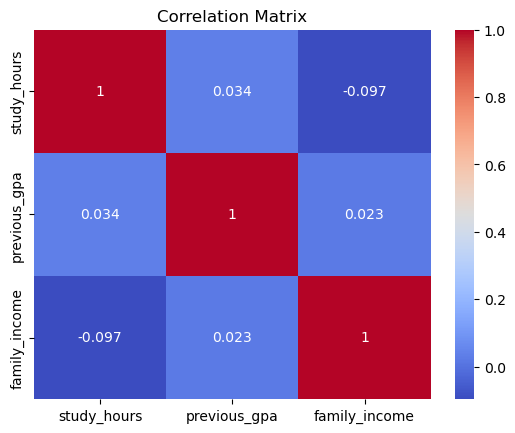

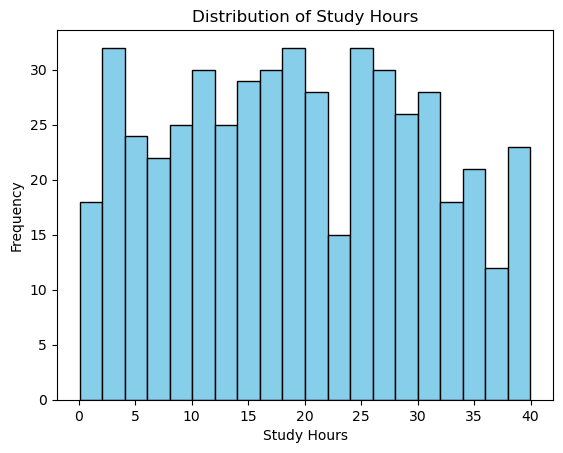

In [5]:
# Making a correlation matrix to check the correlation of the features with one another.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Creating a histogram of study hours to check how much variation they show.
plt.hist(df['study_hours'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency")
plt.show()

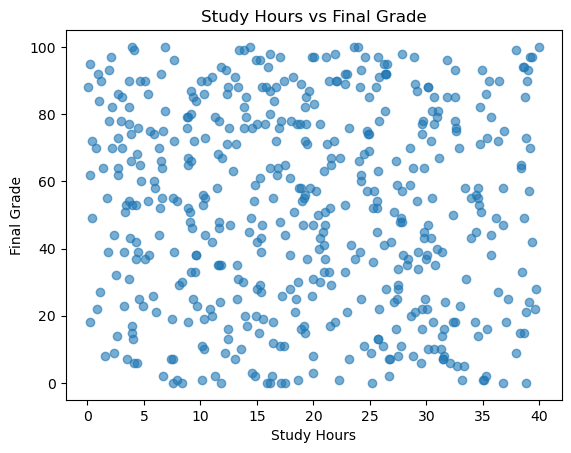

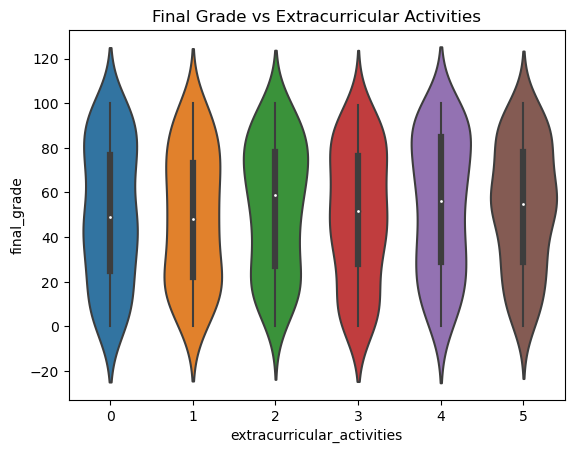

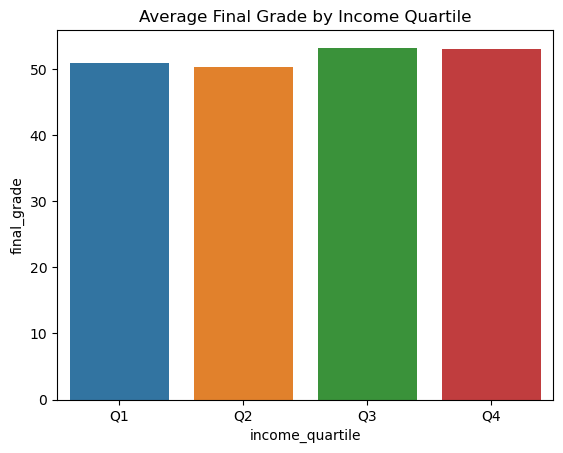


Correlation between Study Hours and Final Grade: -0.05

Average Final Grade by Gender:
gender
Female    52.033058
Male      51.686047
Name: final_grade, dtype: float64

Correlation between Family Income and Final Grade: 0.05

Final Grade by Extracurricular Activities:
extracurricular_activities
0    50.978495
1    48.814815
2    53.705882
3    49.637500
4    54.283951
5    53.737500
Name: final_grade, dtype: float64


In [6]:
# Task 4: Visualization
# Scatter plot of study_hours vs final_grade
plt.scatter(df['study_hours'], df['final_grade'], alpha=0.6)
plt.title("Study Hours vs Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.show()

# Violin plot of final_grade across extracurricular_activities
sns.violinplot(x='extracurricular_activities', y='final_grade', data=df)
plt.title("Final Grade vs Extracurricular Activities")
plt.show()

# Bar plot showing average final_grade by income quartiles
df['income_quartile'] = pd.qcut(df['family_income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
income_avg_grade = df.groupby('income_quartile')['final_grade'].mean().reset_index()

sns.barplot(x='income_quartile', y='final_grade', data=income_avg_grade)
plt.title("Average Final Grade by Income Quartile")
plt.show()

# Task 5: Satistical Analysis with Graphical representation.
# Correlation between study hours and final grade
study_corr = df['study_hours'].corr(df['final_grade'])
print(f"\nCorrelation between Study Hours and Final Grade: {study_corr:.2f}")

# Group-based analysis
gender_diff = df.groupby('gender')['final_grade'].mean()
print(f"\nAverage Final Grade by Gender:\n{gender_diff}")

income_corr = df['family_income'].corr(df['final_grade'])
print(f"\nCorrelation between Family Income and Final Grade: {income_corr:.2f}")

activity_analysis = df.groupby('extracurricular_activities')['final_grade'].mean()
print(f"\nFinal Grade by Extracurricular Activities:\n{activity_analysis}")